# House Prices Exploratory Data Analysis

Northwestern University

Master of Science in Data Science 422 - Practical Machine Learning

Group 3 - Claire Markey, Julia Granito, Manuel Hurtado, and Steve Desilets

## 1) Introduction

## 2) Exploratory Data Analysis Findings

## 3) Appendix - Python Code and Outputs

### 3.1) Data Preparation

First, we will set up this notebook so that it will display multiple outputs for each cell if needed.

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Second, we will import the data.  We will view the first five rows of data and the shape of the dataframe to confirm that the data imported correctly.

In [4]:
import pandas as pd
allstate_training_data = pd.read_csv('train.csv')

allstate_training_data.head()
allstate_training_data.shape

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


(188318, 132)

### 3.2) Distribution of the Dependent Variable

We can begin examining the distribution of this dataset's dependent variable, loss, by generating summary statistics for this variable.

In [5]:
allstate_training_data['loss'].describe()

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

We can also construct a histogram and a boxplot to visualize the distribution of the loss variable in this dataframe 

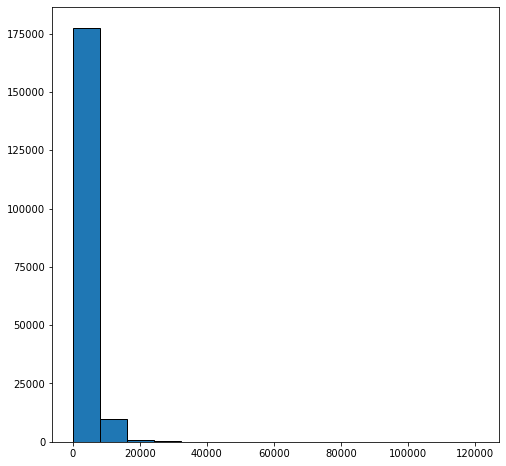

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

histogram = allstate_training_data['loss'].hist(edgecolor = 'black', bins = 15, figsize = (8, 8), grid = False)

<AxesSubplot:xlabel='loss'>

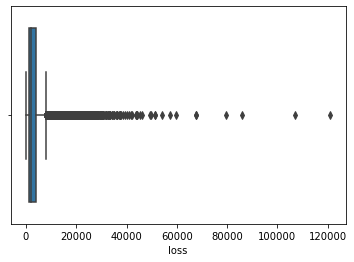

In [7]:
sns.boxplot(x=allstate_training_data["loss"])

### 3.3) Investigation of Missing Data and Outliers

We can take a look at the counts fo reported values in each column to determine the number of missing values for each variable in the dataframe.

In [8]:
allstate_training_data.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Data columns (total 132 columns):
 #    Column  Non-Null Count   Dtype  
---   ------  --------------   -----  
 0    id      188318 non-null  int64  
 1    cat1    188318 non-null  object 
 2    cat2    188318 non-null  object 
 3    cat3    188318 non-null  object 
 4    cat4    188318 non-null  object 
 5    cat5    188318 non-null  object 
 6    cat6    188318 non-null  object 
 7    cat7    188318 non-null  object 
 8    cat8    188318 non-null  object 
 9    cat9    188318 non-null  object 
 10   cat10   188318 non-null  object 
 11   cat11   188318 non-null  object 
 12   cat12   188318 non-null  object 
 13   cat13   188318 non-null  object 
 14   cat14   188318 non-null  object 
 15   cat15   188318 non-null  object 
 16   cat16   188318 non-null  object 
 17   cat17   188318 non-null  object 
 18   cat18   188318 non-null  object 
 19   cat19   188318 non-null  object 
 20   cat20   188318 non-null 

We can also create boxplots for each of the continuous variables in the dataframe to analyze whether outliers exist for each of those variables.

<AxesSubplot:xlabel='cont1'>

<AxesSubplot:xlabel='cont2'>

<AxesSubplot:xlabel='cont3'>

<AxesSubplot:xlabel='cont4'>

<AxesSubplot:xlabel='cont5'>

<AxesSubplot:xlabel='cont6'>

<AxesSubplot:xlabel='cont7'>

<AxesSubplot:xlabel='cont8'>

<AxesSubplot:xlabel='cont9'>

<AxesSubplot:xlabel='cont10'>

<AxesSubplot:xlabel='cont11'>

<AxesSubplot:xlabel='cont12'>

<AxesSubplot:xlabel='cont13'>

<AxesSubplot:xlabel='cont14'>

<AxesSubplot:xlabel='loss'>

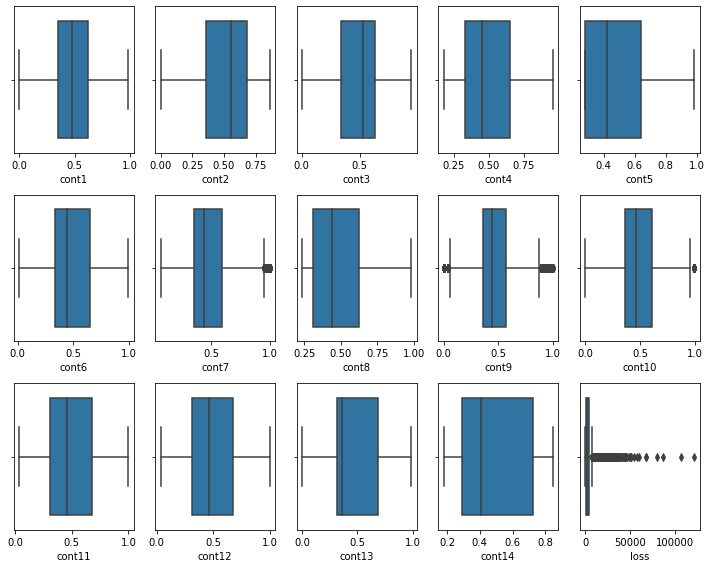

In [56]:
numerical_vars = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10',
                 'cont11', 'cont12', 'cont13', 'cont14', 'loss']

fig, ax = plt.subplots(3, 5, figsize = (10, 8))

for var, subplot in zip(numerical_vars, ax.flatten()):
    sns.boxplot(x=allstate_training_data[var], ax = subplot)
    
fig.tight_layout()

### 3.4) Examination of the Relationship between the Dependent Variable and Potential Predictors

We can use a correlation heatmap to quantify the correlation between the dependent variable, loss, and the potential continuous predictor variables.

<AxesSubplot:>

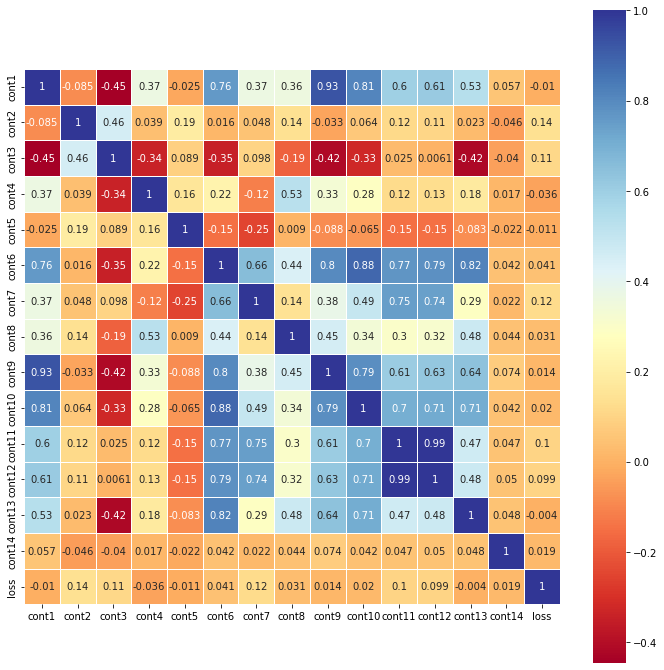

In [10]:
numerical_vars = ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10',
                 'cont11', 'cont12', 'cont13', 'cont14', 'loss']

df_corr_allstate_training = allstate_training_data[numerical_vars]
corrmat_allstate_training = df_corr_allstate_training.corr()

f, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corrmat_allstate_training, vmax = 1, square = True, annot = True,
           cmap = 'RdYlBu', linewidths = 0.5)

We can use jointplots to take a closer look at the relationship between loss and the three continuous variables with which loss has the strongest correlation: cont2, cont3, and cont11.

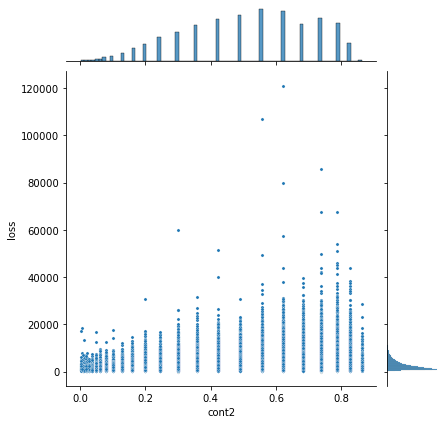

In [11]:
sns.jointplot(x='cont2', y='loss', data = allstate_training_data, joint_kws={"s": 10});

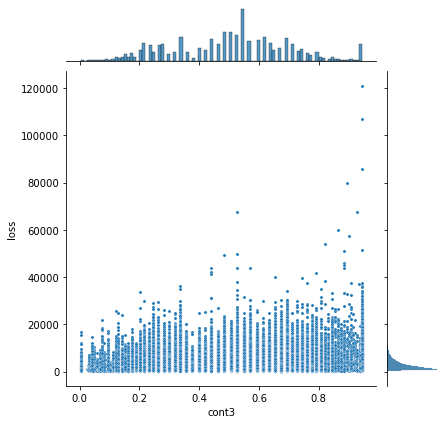

In [12]:
sns.jointplot(x='cont3', y='loss', data = allstate_training_data, joint_kws={"s": 10});

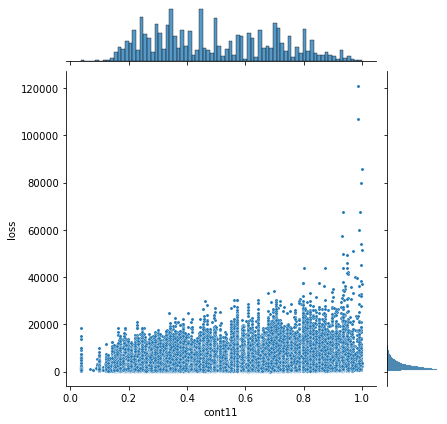

In [13]:
sns.jointplot(x='cont11', y='loss', data = allstate_training_data, joint_kws={"s": 10});

### 3.5) Creation of Potential New Features

### 3.6) Scaling of the Dependent Variable

We can create a copy of the loss variable that has been standardized via standard scaling.  We can examine the summary statistics of this new variable to confirm we've applied standard scaling correctly to this new variable.

In [32]:
from sklearn import preprocessing
standardized_loss = preprocessing.scale(allstate_training_data['loss'])
allstate_training_data['standardized_loss'] = standardized_loss.tolist()

allstate_training_data['standardized_loss'].describe()

count    1.883180e+05
mean     1.463992e-16
std      1.000003e+00
min     -1.045656e+00
25%     -6.311392e-01
50%     -3.174045e-01
75%      2.846711e-01
max      4.062387e+01
Name: standardized_loss, dtype: float64

Given that the mean of the new standardized loss variable is (approximately) 0 and the standard deviation of the new standardized loss variable is (approximately) 1, we can have confidence that we performed the appropriate transformation correctly and successfully.

Similarly, we can create a copy of the loss variable that has been standardized via min-max scaling.  Then, we can examine the summary statistics of this new variable to confirm we've applied min-max scaling correctly to this new variable.

In [34]:
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
allstate_training_data[['min_max_scaled_loss']] = scaler.fit_transform(allstate_training_data[['loss']])

allstate_training_data.shape
allstate_training_data.head()

allstate_training_data['min_max_scaled_loss'].describe()

(188318, 134)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,standardized_loss,min_max_scaled_loss
0,1,A,B,A,B,A,A,A,A,B,...,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,-0.283793,0.018283
1,2,A,B,A,A,A,A,A,A,B,...,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,-0.603888,0.010602
2,5,A,B,A,A,B,A,A,A,B,...,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,-0.011104,0.024828
3,10,B,B,A,B,A,A,A,A,B,...,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,-0.722256,0.007761
4,11,A,B,A,B,A,A,A,A,B,...,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,-0.094174,0.022834


count    188318.000000
mean          0.025094
std           0.023998
min           0.000000
25%           0.009948
50%           0.017477
75%           0.031926
max           1.000000
Name: min_max_scaled_loss, dtype: float64

Given that the maximum value in the new min-max scaled loss variable is 1 and the minimum value in the new min-max scaled loss variable is 1, we can have confidence that we performed the appropriate transformation correctly and successfully.